C:\Users\gunja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gunja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gunja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gunja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

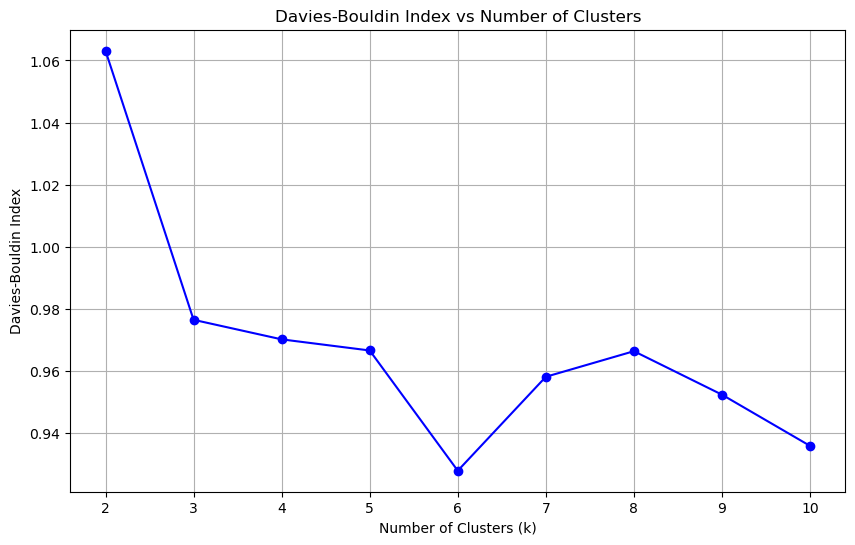

Optimal number of clusters: 6
Best DB Index score: 0.9278


C:\Users\gunja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gunja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


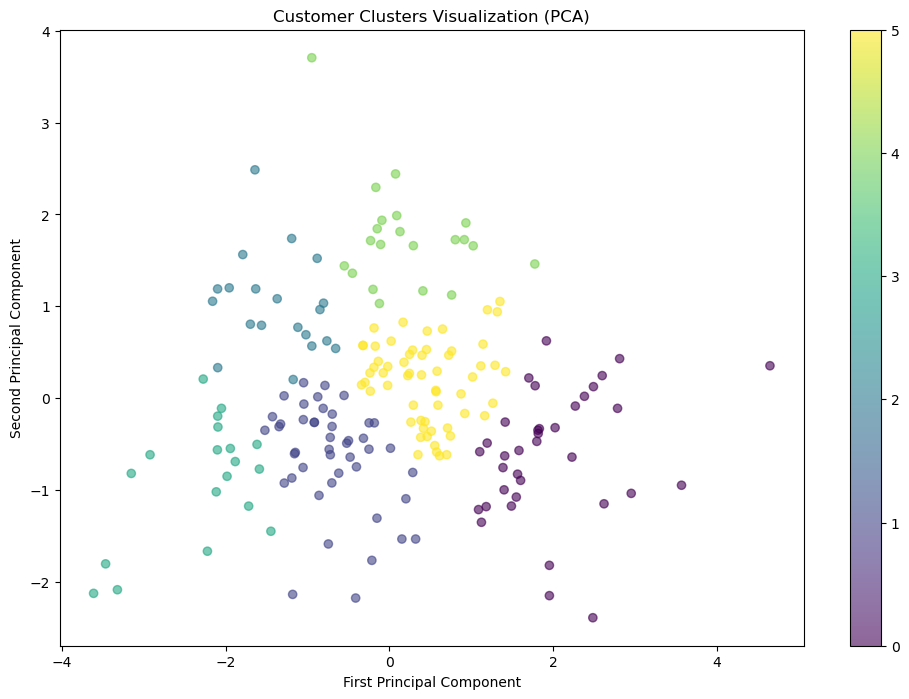

Cluster Profiles:
         total_quantity  avg_price  total_spend
Cluster                                        
0                 22.19     280.31      2291.30
1                 12.24     218.61      1006.14
2                  5.00     305.26       675.56
3                  5.63     158.67       403.60
4                  9.00     387.18      1399.61
5                 13.64     291.38      1624.48
Additional Clustering Metrics:
Silhouette Score: 0.3194
Calinski-Harabasz Score: 119.2956


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and merge data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Create customer features
customer_purchase_features = transactions.groupby('CustomerID').agg({
    'Quantity': ['sum', 'mean', 'std'],
    'Price': ['mean', 'sum', 'std']
}).fillna(0)

customer_purchase_features.columns = ['total_quantity', 'avg_quantity', 'std_quantity',
                                    'avg_price', 'total_spend', 'std_price']

# Merge with customer demographics
customer_features = customers.merge(customer_purchase_features, 
                                  left_on='CustomerID', 
                                  right_index=True)

# Select features for clustering
features_for_clustering = ['total_quantity', 'avg_price', 'total_spend']
X = customer_features[features_for_clustering]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate DB Index for different k values
db_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    db_score = davies_bouldin_score(X_scaled, labels)
    db_scores.append(db_score)

# Plot DB Index
plt.figure(figsize=(10, 6))
plt.plot(k_values, db_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.grid(True)
plt.show()

# Choose optimal k and perform final clustering
optimal_k = k_values[np.argmin(db_scores)]
print(f"Optimal number of clusters: {optimal_k}")
print(f"Best DB Index score: {min(db_scores):.4f}")

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features['Cluster'] = final_kmeans.fit_predict(X_scaled)

# Visualize clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customer_features['Cluster'], 
                     cmap='viridis', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Customer Clusters Visualization (PCA)')
plt.colorbar(scatter)
plt.show()

# Calculate and display cluster profiles
cluster_profiles = customer_features.groupby('Cluster')[features_for_clustering].mean().round(2)
print("\
Cluster Profiles:")
print(cluster_profiles)

# Additional metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score
silhouette_avg = silhouette_score(X_scaled, customer_features['Cluster'])
calinski_score = calinski_harabasz_score(X_scaled, customer_features['Cluster'])

print("\
Additional Clustering Metrics:")
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Calinski-Harabasz Score: {calinski_score:.4f}")

In [2]:

pip install nbconvert[webpdf]


In [3]:
!jupyter nbconvert --to webpdf --allow-chromium-download Gunjan_Agarwal_Clustering.ipynb




[NbConvertApp] Converting notebook Gunjan_Agarwal_Clustering.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 246042 bytes to Gunjan_Agarwal_Clustering.pdf
